# CARMENES / GTO DATABASE LOADING AND INSPECTION
**Purpose:** locating GTO objects in instability strips and check for missing light curve data
(With pandas)

## Modules and configuration

### Modules

In [1]:
# Modules import:
import numpy as np

import pandas as pd
from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
sns.set_style("white", {'figure.figsize':(15,10)})
#sns.set_style("whitegrid")
#sns.set(rc={'figure.figsize':(15,8)})

### Configuration

In [2]:
# Configuration:
# Files:
INPUT_FILE = "../data/carmencita.102_mod.csv"
SYNTH_POP_FILE = "../data/Auxiliary_data/ETLed__NoLimit_TFM_02_MW_2022-01-13-19-18-22_hdr.csv"
OUTPUT_FILE = "../data/carmencita.102_mod.csv"
GTO_OUTPUT_FILE = "../data/GTO_objects.csv"
GTO_NAN_RECORD_FILE = "../data/GTO_NaN_logg_objects.csv"
GTO_NAN_FILE = "../data/GTO_NaN_Count.csv"
GTO_NO_LC_FILE = "../data/GTO_With_no_LC_Data.csv"

IMAGE_NOMINAL_OUT = "./img/ETL_10_01_GTO_Instability_bands_Nominal.png"
IMAGE_RANGED_OUT = "./img/ETL_10_02_GTO_Instability_bands_Ranged.png"
IMAGE_RANGED_OUT_FULL_HR = "./img/ETL_10_03_GTO_Instability_bands_Ranged_Full_HR.png"
IMAGE_NO_LC_GTO_LOCATION = "./img/ETL_10_04_Location_of_GTO_without_LC.png"
IMAGE_HR_TEFF = "./img/ETL_10_05_Carmenes_objects_in_HR_diagram.png"

# Instability bands:
INST_B = {
    'D-burning': {
        'logg': {
            'min': 3.1,
            'max': 3.6
        },
        'Teff': {
            'min': 2800,
            'max': 3500
        }
    },
    'He3-burning': {
        'logg': {
            'min': 4.5,
            'max': 5.1
        },
        'Teff': {
            'min': 3300,
            'max': 4300
        }
    }
}

# Star physical parameters:
PHYS_PARAMS = []



## Data loading

### Load CARMENES data

In [3]:
carmenes = pd.read_csv(INPUT_FILE, sep=',', decimal='.')
carmenes.head()

,Karmn,Name,Comp,GJ,RA_J2016_deg,DE_J2016_deg,RA_J2000,DE_J2000,l_J2016_deg,b_J2016_deg,...,Teff_max_K,logg_min,logg_max,is_GTO,rv_file,lc_file,has_rv,has_lc,InstBand_nominal,InstBand_ranged
0,J23598+477,LP 149-014,-,4385,359.962056,47.761478,23:59:49.51,+47:45:44.5,114.027674,-14.216353,...,3050.0,4.50,5.50,False,NaN,NaN,False,False,none,none
1,J23590+208,G 129-051,-,NaN,359.753066,20.860336,23:59:00.42,+20:51:39.0,106.785616,-40.361996,...,NaN,NaN,NaN,False,NaN,NaN,False,False,none,none
2,J23587+467,BD+45 4378 AB,AB,913,359.685432,46.729152,23:58:43.49,+46:43:44.7,113.616244,-15.187224,...,NaN,NaN,NaN,False,NaN,NaN,False,False,none,none
3,J23585+076,Wolf 1051,AB,4383,359.636420,7.656947,23:58:32.65,+07:39:30.1,100.839686,-52.931049,...,3516.0,4.89,5.05,True,../data/CARMENES_GTO_RVs/J23585+076.dat,NaN,True,False,He3-burning,He3-burning
4,J23582-174,LP 764-040,AB,NaN,359.558095,-17.409041,23:58:13.69,-17:24:32.9,68.527865,-74.336758,...,NaN,NaN,NaN,False,NaN,NaN,False,False,none,none


In [4]:
print(carmenes.columns.tolist())

['Karmn', 'Name', 'Comp', 'GJ', 'RA_J2016_deg', 'DE_J2016_deg', 'RA_J2000', 'DE_J2000', 'l_J2016_deg', 'b_J2016_deg', 'Ref01', 'SpT', 'SpTnum', 'Ref02', 'Teff_K', 'eTeff_K', 'logg', 'elogg', '[Fe/H]', 'e[Fe/H]', 'Ref03', 'L_Lsol', 'eL_Lsol', 'Ref04', 'R_Rsol', 'eR_Rsol', 'Ref05', 'M_Msol', 'eM_Msol', 'Ref06', 'muRA_masa-1', 'emuRA_masa-1', 'muDE_masa-1', 'emuDE_masa-1', 'Ref07', 'pi_mas', 'epi_mas', 'Ref08', 'd_pc', 'ed_pc', 'Ref09', 'Vr_kms-1', 'eVr_kms-1', 'Ref10', 'ruwe', 'Ref11', 'U_kms-1', 'eU_kms-1', 'V_kms-1', 'eV_kms-1', 'W_kms-1', 'eW_kms-1', 'Ref12', 'sa_m/s/a', 'esa_m/s/a', 'Ref13', 'SKG', 'Ref14', 'SKG_lit', 'Ref14_lit', 'Pop', 'Ref15', 'vsini_flag', 'vsini_kms-1', 'evsini_kms-1', 'Ref16', 'P_d', 'eP_d', 'Ref17', 'pEWHalpha_A', 'epEWHalpha_A', 'Ref18', 'log(LHalpha/Lbol)', 'elog(LHalpha/Lbol)', 'Ref19', '1RXS', 'CRT_s-1', 'eCRT_s-1', 'HR1', 'eHR1', 'HR2', 'eHR2', 'Flux_X_E-13_ergcm-2s-1', 'eFlux_X_E-13_ergcm-2s-1', 'LX/LJ', 'eLX/LJ', 'Ref20', 'Activity', 'Ref21', 'FUV_mag',

### Load synthetic stellar population

This is a synthetic star population generated with BaSTI tool (), with the following parameters:


The file has been previously preprocessed with notebook `ETL_07_BaSTI_SynthPop_File_Preprocessing_v2.0.ipynb`

In [5]:
stellar_pop = pd.read_csv(SYNTH_POP_FILE, sep=',', decimal='.')
stellar_pop.head()

,star_number,log(t[years]),Metallicity[Fe/H],Mass[Mo],log(L/Lo),log(Teff[K]),InitMassSec[Mo],VarStarIdx,Pulsating_log(P[days]),u,...,g-r,r-i,i-z,log_g,Teff,Age [Gyr],Age Range [Gyr],ID Age Range,Metallicity Range [Fe/H],ID Metallicity Range
0,1,9.924415,-1.4575,0.1090,-2.8361,3.5084,0.0928,0,99.99,18.0943,...,1.8538,0.8023,0.4662,5.296607,3224.036872,8.402622,from 7.5 to 10.0 Gyr,Age_3,from -2.0 to -1.0 [Fe/H],Met_1
1,2,9.947005,-1.2202,0.1081,-2.8307,3.5138,0.0867,0,99.99,17.9405,...,1.8141,0.7850,0.4546,5.309206,3264.374675,8.851255,from 7.5 to 10.0 Gyr,Age_3,from -2.0 to -1.0 [Fe/H],Met_1
2,4,9.913869,-0.7478,0.2711,-1.8518,3.5874,0.2057,0,99.99,13.1454,...,1.4078,0.5379,0.3096,5.024010,3867.229981,8.201037,from 7.5 to 10.0 Gyr,Age_3,from -1.0 to -0.5 [Fe/H],Met_2
3,6,9.965860,-1.0048,0.2449,-1.8871,3.5979,0.2222,0,99.99,12.7719,...,1.2943,0.5010,0.2886,5.057169,3961.867984,9.244008,from 7.5 to 10.0 Gyr,Age_3,from -2.0 to -1.0 [Fe/H],Met_1
4,8,9.919496,-1.4860,0.1656,-2.2855,3.5691,0.1339,0,99.99,14.7574,...,1.6028,0.6053,0.3360,5.170441,3707.660840,8.308000,from 7.5 to 10.0 Gyr,Age_3,from -2.0 to -1.0 [Fe/H],Met_1


In [6]:
stellar_pop.columns

Index(['star_number', 'log(t[years])', 'Metallicity[Fe/H]', 'Mass[Mo]',
       'log(L/Lo)', 'log(Teff[K])', 'InitMassSec[Mo]', 'VarStarIdx',
       'Pulsating_log(P[days])', 'u', 'g', 'r', 'i', 'z', 'u-g', 'g-r', 'r-i',
       'i-z', 'log_g', 'Teff', 'Age [Gyr]', 'Age Range [Gyr]', 'ID Age Range',
       'Metallicity Range [Fe/H]', 'ID Metallicity Range'],
      dtype='object')

## Mark instability band (if appropriate)

### With nominal values (using just `logg` variable)

In [7]:
carmenes['InstBand_nominal'] = "none"

In [8]:
# Mark stars in instability bands (using nominal values):
for ib in INST_B.keys():
    carmenes.loc[(carmenes['logg'] >= INST_B[ib]['logg']['min']) &
                 (carmenes['logg'] <= INST_B[ib]['logg']['max']) &
                 (carmenes['Teff_K'] >= INST_B[ib]['Teff']['min']) &
                 (carmenes['Teff_K'] <= INST_B[ib]['Teff']['max']),
                 'InstBand_nominal'] = ib

carmenes.head()

,Karmn,Name,Comp,GJ,RA_J2016_deg,DE_J2016_deg,RA_J2000,DE_J2000,l_J2016_deg,b_J2016_deg,...,Teff_max_K,logg_min,logg_max,is_GTO,rv_file,lc_file,has_rv,has_lc,InstBand_nominal,InstBand_ranged
0,J23598+477,LP 149-014,-,4385,359.962056,47.761478,23:59:49.51,+47:45:44.5,114.027674,-14.216353,...,3050.0,4.50,5.50,False,NaN,NaN,False,False,none,none
1,J23590+208,G 129-051,-,NaN,359.753066,20.860336,23:59:00.42,+20:51:39.0,106.785616,-40.361996,...,NaN,NaN,NaN,False,NaN,NaN,False,False,none,none
2,J23587+467,BD+45 4378 AB,AB,913,359.685432,46.729152,23:58:43.49,+46:43:44.7,113.616244,-15.187224,...,NaN,NaN,NaN,False,NaN,NaN,False,False,none,none
3,J23585+076,Wolf 1051,AB,4383,359.636420,7.656947,23:58:32.65,+07:39:30.1,100.839686,-52.931049,...,3516.0,4.89,5.05,True,../data/CARMENES_GTO_RVs/J23585+076.dat,NaN,True,False,He3-burning,He3-burning
4,J23582-174,LP 764-040,AB,NaN,359.558095,-17.409041,23:58:13.69,-17:24:32.9,68.527865,-74.336758,...,NaN,NaN,NaN,False,NaN,NaN,False,False,none,none


Check the total number of stars in instability bands (nominal):

In [9]:
carmenes['InstBand_nominal'].value_counts()

none           1231
He3-burning     981
Name: InstBand_nominal, dtype: int64

**OBSERVATION:** no star at all is in the instability strip of _"D-burning"_ cases.

Check the GTO stars in instability bands (nominal):

In [10]:
carmenes.loc[carmenes['is_GTO'] == True, 'InstBand_nominal'].value_counts()

He3-burning    224
none           139
Name: InstBand_nominal, dtype: int64

### With ranged values (including  `elogg` variable)

We first check the max values of `eTeff_K` and `elogg`, just in case the instability bands could overlap and hence provoke ambiguous band assignation.

In [11]:
INST_B

{'D-burning': {'logg': {'min': 3.1, 'max': 3.6},
  'Teff': {'min': 2800, 'max': 3500}},
 'He3-burning': {'logg': {'min': 4.5, 'max': 5.1},
  'Teff': {'min': 3300, 'max': 4300}}}

In [12]:
carmenes[['eTeff_K', 'elogg']].describe()

,eTeff_K,elogg
count,1657.000000,1652.000000
mean,45.379602,0.410533
std,11.216744,0.160944
min,9.000000,0.030000
25%,50.000000,0.500000
50%,50.000000,0.500000
75%,50.000000,0.500000
max,97.000000,0.500000


Maximum value of `elogg` is $0.5$, so the assignment to instability bands will not be ambiguous.

In [13]:
carmenes.columns

Index(['Karmn', 'Name', 'Comp', 'GJ', 'RA_J2016_deg', 'DE_J2016_deg',
       'RA_J2000', 'DE_J2000', 'l_J2016_deg', 'b_J2016_deg',
       ...
       'Teff_max_K', 'logg_min', 'logg_max', 'is_GTO', 'rv_file', 'lc_file',
       'has_rv', 'has_lc', 'InstBand_nominal', 'InstBand_ranged'],
      dtype='object', length=186)

In [14]:
carmenes['InstBand_ranged'] = "none"

In [15]:
# Mark stars in instability bands (ussing range of values):
for ib in INST_B.keys():
    mask_range_logg = ((carmenes['logg_min'] >= INST_B[ib]['logg']['min']) & \
                   (carmenes['logg_min'] <= INST_B[ib]['logg']['max'])) | \
                ((carmenes['logg_max'] >= INST_B[ib]['logg']['min']) & \
                 (carmenes['logg_max'] <= INST_B[ib]['logg']['max']))
    mask_range_Teff = ((carmenes['Teff_min_K'] >= INST_B[ib]['Teff']['min']) & \
                   (carmenes['Teff_min_K'] <= INST_B[ib]['Teff']['max'])) | \
                ((carmenes['Teff_max_K'] >= INST_B[ib]['Teff']['min']) & \
                 (carmenes['Teff_max_K'] <= INST_B[ib]['Teff']['max']))
    carmenes.loc[mask_range_logg & mask_range_Teff,
                 'InstBand_ranged'] = ib

carmenes.head()

,Karmn,Name,Comp,GJ,RA_J2016_deg,DE_J2016_deg,RA_J2000,DE_J2000,l_J2016_deg,b_J2016_deg,...,Teff_max_K,logg_min,logg_max,is_GTO,rv_file,lc_file,has_rv,has_lc,InstBand_nominal,InstBand_ranged
0,J23598+477,LP 149-014,-,4385,359.962056,47.761478,23:59:49.51,+47:45:44.5,114.027674,-14.216353,...,3050.0,4.50,5.50,False,NaN,NaN,False,False,none,none
1,J23590+208,G 129-051,-,NaN,359.753066,20.860336,23:59:00.42,+20:51:39.0,106.785616,-40.361996,...,NaN,NaN,NaN,False,NaN,NaN,False,False,none,none
2,J23587+467,BD+45 4378 AB,AB,913,359.685432,46.729152,23:58:43.49,+46:43:44.7,113.616244,-15.187224,...,NaN,NaN,NaN,False,NaN,NaN,False,False,none,none
3,J23585+076,Wolf 1051,AB,4383,359.636420,7.656947,23:58:32.65,+07:39:30.1,100.839686,-52.931049,...,3516.0,4.89,5.05,True,../data/CARMENES_GTO_RVs/J23585+076.dat,NaN,True,False,He3-burning,He3-burning
4,J23582-174,LP 764-040,AB,NaN,359.558095,-17.409041,23:58:13.69,-17:24:32.9,68.527865,-74.336758,...,NaN,NaN,NaN,False,NaN,NaN,False,False,none,none


Check the total number of stars in instability bands (ranged):

In [16]:
carmenes['InstBand_ranged'].value_counts()

He3-burning    1157
none           1055
Name: InstBand_ranged, dtype: int64

Check the GTO stars in instability bands (nominal):

In [17]:
carmenes.loc[carmenes['is_GTO'] == True, 'InstBand_ranged'].value_counts()

He3-burning    259
none           104
Name: InstBand_ranged, dtype: int64

### Summary of stats

In [18]:
carmenes[['is_GTO', 'InstBand_nominal', 'Karmn']] \
    .groupby(by=['is_GTO', 'InstBand_nominal']).count()

Karmn
is_GTO InstBand_nominal       
False  He3-burning         757
       none               1092
True   He3-burning         224
       none                139

In [19]:
carmenes[['is_GTO', 'InstBand_ranged', 'Karmn']] \
    .groupby(by=['is_GTO', 'InstBand_ranged']).count()

Karmn
is_GTO InstBand_ranged       
False  He3-burning        898
       none               951
True   He3-burning        259
       none               104

### Check `NaN` values

Check `Nan` values of the data (`Teff_K` and `logg`variables):

In [20]:
carmenes[['Teff_K', 'logg']].isna().sum().reset_index()

,index,0
0,Teff_K,555
1,logg,560


In [21]:
carmenes.shape

(2212, 186)

Hence, about $25\%$ of the whole dataset is missing `logg` and/or `Teff` values.

In [22]:
carmenes[carmenes['is_GTO'] == True][['Teff_K', 'logg']].isna().sum().reset_index()

,index,0
0,Teff_K,0
1,logg,4


In [23]:
carmenes[carmenes['is_GTO'] == True].shape

(363, 186)

Hence, only about $1\%$ is missing `logg` values.

In [24]:
gto_nan_logg_teff = carmenes[(carmenes['is_GTO'] == True) &
                            ((carmenes['logg'].isna()) | (carmenes['Teff_K'].isna()))].copy()
gto_nan_logg_teff

,Karmn,Name,Comp,GJ,RA_J2016_deg,DE_J2016_deg,RA_J2000,DE_J2000,l_J2016_deg,b_J2016_deg,...,Teff_max_K,logg_min,logg_max,is_GTO,rv_file,lc_file,has_rv,has_lc,InstBand_nominal,InstBand_ranged
180,J22102+587,TOI-2285,-,NaN,332.563270,58.706090,22:10:15.14,+58:42:22.2,103.288489,2.123561,...,3550.0,NaN,NaN,True,../data/CARMENES_GTO_RVs/J22102+587.dat,NaN,True,False,none,none
345,J20109+708,TYC 4450-1440-1,-,NaN,302.737507,70.869661,20:10:57.12,+70:52:09.8,103.864573,19.367775,...,4550.0,NaN,NaN,True,../data/CARMENES_GTO_RVs/J20109+708.dat,NaN,True,False,none,none
436,J19025+754,LSPM J1902+7525,-,NaN,285.636636,75.418511,19:02:31.93,+75:25:07.0,106.755821,25.495532,...,3750.0,NaN,NaN,True,../data/CARMENES_GTO_RVs/J19025+754.dat,NaN,True,False,none,none
1282,J09286-121,G 161-32,-,NaN,142.173451,-12.167219,09:28:41.58,-12:09:55.1,244.789722,27.071193,...,3550.0,NaN,NaN,True,../data/CARMENES_GTO_RVs/J09286-121.dat,NaN,True,False,none,none


Check `Nan` values in any of the variables

In [25]:
gto_nan = carmenes[carmenes['is_GTO'] == True].isna().sum()
gto_nan = gto_nan[gto_nan > 0]
gto_nan

GJ           91
logg          4
elogg         4
[Fe/H]        4
e[Fe/H]      36
           ... 
Survey        2
Notes       324
logg_min      4
logg_max      4
lc_file     133
Length: 130, dtype: int64

In [26]:
print(gto_nan.index.to_list())

['GJ', 'logg', 'elogg', '[Fe/H]', 'e[Fe/H]', 'R_Rsol', 'eR_Rsol', 'Ref05', 'M_Msol', 'eM_Msol', 'Ref06', 'pi_mas', 'epi_mas', 'Ref08', 'Vr_kms-1', 'eVr_kms-1', 'Ref10', 'ruwe', 'Ref11', 'U_kms-1', 'eU_kms-1', 'V_kms-1', 'eV_kms-1', 'W_kms-1', 'eW_kms-1', 'Ref12', 'sa_m/s/a', 'esa_m/s/a', 'Ref13', 'SKG', 'Ref14', 'SKG_lit', 'Ref14_lit', 'Pop', 'Ref15', 'vsini_flag', 'vsini_kms-1', 'evsini_kms-1', 'Ref16', 'P_d', 'eP_d', 'Ref17', 'pEWHalpha_A', 'epEWHalpha_A', 'Ref18', 'log(LHalpha/Lbol)', 'elog(LHalpha/Lbol)', 'Ref19', '1RXS', 'CRT_s-1', 'eCRT_s-1', 'HR1', 'eHR1', 'HR2', 'eHR2', 'Flux_X_E-13_ergcm-2s-1', 'eFlux_X_E-13_ergcm-2s-1', 'LX/LJ', 'eLX/LJ', 'Ref20', 'Activity', 'Ref21', 'FUV_mag', 'eFUV_mag', 'NUV_mag', 'eNUV_mag', 'Ref22', 'u_mag', 'eu_mag', 'Ref23', 'BT_mag', 'eBT_mag', 'Ref24', 'B_mag', 'eB_mag', 'Ref25', 'g_mag', 'eg_mag', 'Ref27', 'VT_mag', 'eVT_mag', 'Ref28', 'V_mag', 'eV_mag', 'Ref29', 'Ra_mag', 'Ref30', 'r_mag', 'er_mag', 'Ref31', 'i_mag', 'ei_mag', 'Ref33', 'IN_mag', '

In [27]:
len(gto_nan)

130

### GTO objects without light curve data

In [28]:
gto_no_lc = carmenes[(carmenes['is_GTO'] == True) &
                     (carmenes['has_lc'] == False)].copy()
gto_no_lc.shape

(133, 186)

Grouped by instability band or not:

In [29]:
gto_no_lc[['Karmn', 'InstBand_ranged']].groupby('InstBand_ranged').count()

,Karmn
InstBand_ranged,
He3-burning,87
none,46


## Data visualization

In [30]:
gto = carmenes[carmenes['is_GTO'] == True].copy()

gto.shape

(363, 186)

### Only GTO objects (_zoom_)

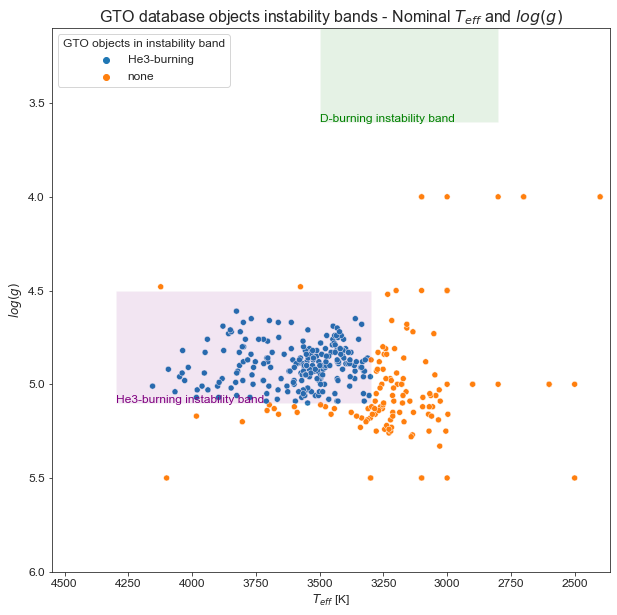

In [31]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=gto, x='Teff_K', y='logg', hue='InstBand_nominal')
# Set plot limits as per global CARMENES data values.
x_min = min([INST_B['He3-burning']['Teff']['min'], INST_B['D-burning']['Teff']['min'],
             carmenes['Teff_min_K'].min()])
x_max = max([INST_B['He3-burning']['Teff']['max'], INST_B['D-burning']['Teff']['max'],
             carmenes['Teff_max_K'].max()])
y_min = min([INST_B['He3-burning']['logg']['min'], INST_B['D-burning']['logg']['min'],
             carmenes['logg_min'].min()])
y_max = max([INST_B['He3-burning']['logg']['max'], INST_B['D-burning']['logg']['max'],
             carmenes['logg_max'].max()])
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
# Add and label instability regions:
ax.add_patch(mpatches.Rectangle((2800, 3.1), 700, 0.5, facecolor="green", alpha=0.10))
ax.text(3500, 3.6, "D-burning instability band", color="green", fontsize=12)
ax.add_patch(mpatches.Rectangle((3300, 4.5), 1000, 0.6, facecolor="purple", alpha=0.10))
ax.text(4300, 5.1, "He3-burning instability band", color="purple", fontsize=12)
# Set titles, sizes etc.
ax.set_title("GTO database objects instability bands - Nominal $T_{eff}$ and $log(g)$", fontsize=16)
ax.set_xlabel("$T_{eff}$ [K]", fontsize=12)
ax.set_ylabel("$log(g)$", fontsize=12)
ax.tick_params(axis='both', which='major', bottom=True, left=True, labelsize=12)
ax.invert_xaxis()
ax.invert_yaxis()
plt.legend(title="GTO objects in instability band", title_fontsize='large',
           loc='best', fontsize=12)
plt.savefig(IMAGE_NOMINAL_OUT)
plt.show();

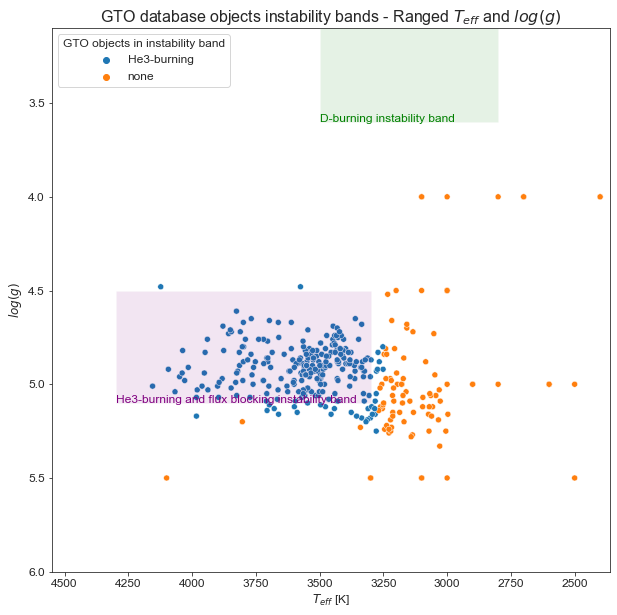

In [32]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=gto, x='Teff_K', y='logg', hue='InstBand_ranged')
# Set plot limits as per global CARMENES data values.
x_min = min([INST_B['He3-burning']['Teff']['min'], INST_B['D-burning']['Teff']['min'],
             carmenes['Teff_min_K'].min()])
x_max = max([INST_B['He3-burning']['Teff']['max'], INST_B['D-burning']['Teff']['max'],
             carmenes['Teff_max_K'].max()])
y_min = min([INST_B['He3-burning']['logg']['min'], INST_B['D-burning']['logg']['min'],
             carmenes['logg_min'].min()])
y_max = max([INST_B['He3-burning']['logg']['max'], INST_B['D-burning']['logg']['max'],
             carmenes['logg_max'].max()])
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
# Add and label instability regions:
ax.add_patch(mpatches.Rectangle((2800, 3.1), 700, 0.5, facecolor="green", alpha=0.10))
ax.text(3500, 3.6, "D-burning instability band", color="green", fontsize=12)
ax.add_patch(mpatches.Rectangle((3300, 4.5), 1000, 0.6, facecolor="purple", alpha=0.10))
ax.text(4300, 5.1, "He3-burning and flux blocking instability band", color="purple", fontsize=12)
# Set titles, sizes etc.
ax.set_title("GTO database objects instability bands - Ranged $T_{eff}$ and $log(g)$", fontsize=16)
ax.set_xlabel("$T_{eff}$ [K]", fontsize=12)
ax.set_ylabel("$log(g)$", fontsize=12)
ax.tick_params(axis='both', which='major', bottom=True, left=True, labelsize=12)
ax.invert_xaxis()
ax.invert_yaxis()
plt.legend(title="GTO objects in instability band", title_fontsize='large',
           loc='best', fontsize=12)
plt.savefig(IMAGE_RANGED_OUT)
plt.show();

### Only GTO objects (HR diagram typical ranges)

In [33]:
gto[['Teff_K', 'logg']].describe()

,Teff_K,logg
count,363.000000,359.000000
mean,3438.807163,4.934206
std,296.667655,0.227844
min,2400.000000,4.000000
25%,3255.000000,4.840000
50%,3455.000000,4.940000
75%,3593.500000,5.060000
max,4500.000000,5.500000


In [34]:
stellar_pop[['Teff', 'log_g']].describe()

,Teff,log_g
count,264732.000000,264732.000000
mean,3611.013316,5.070244
std,712.185099,0.220097
min,2742.837004,0.665406
25%,3218.103443,5.003494
50%,3477.763139,5.110949
75%,3767.905482,5.214531
max,20365.730854,5.385102


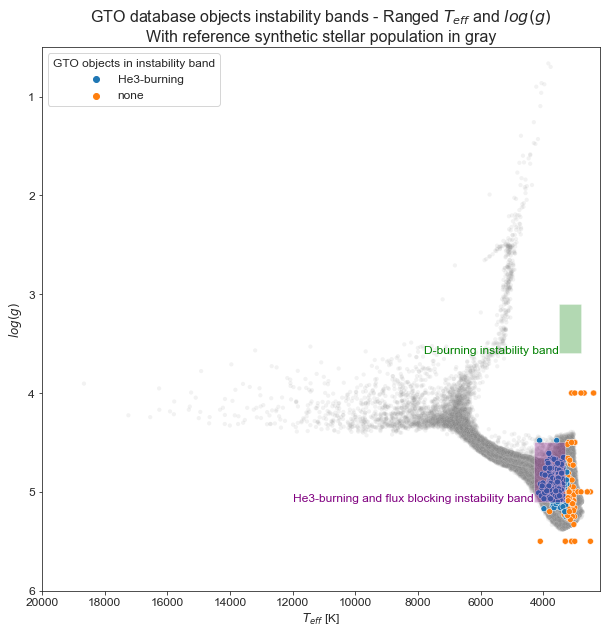

In [35]:
plt.figure(figsize=(10,10))
#ax = sns.scatterplot(data=gto, x='Teff_K', y='logg', hue='InstBand_ranged')
# Draw the synthetic population:
ax = sns.scatterplot(data=stellar_pop, x='Teff', y='log_g', color='gray', size=1.0, alpha=0.1,
                     legend=False)

# Set plot limits as per typical logg and Teff values in HR diagram.
x_min = 2200
x_max = 20000
y_min = 0.50
y_max = 6.00
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

# Add the synthetic population:
#sns.scatterplot(data=stellar_pop, x='Teff', y='log_g', color='gray', size=1.0, alpha=0.1,
#                ax=ax, legend=False)
# Add the GTO objetcs:
sns.scatterplot(data=gto, x='Teff_K', y='logg', hue='InstBand_ranged',
                ax=ax, legend=True)

# Add patches and label for instability regions:
ax.add_patch(mpatches.Rectangle((2800, 3.1), 700, 0.5, facecolor="green", alpha=0.30))
ax.text(3500, 3.6, "D-burning instability band", color="green", fontsize=12, ha='right')
ax.add_patch(mpatches.Rectangle((3300, 4.5), 1000, 0.6, facecolor="purple", alpha=0.30))
ax.text(4300, 5.1, "He3-burning and flux blocking instability band", color="purple", fontsize=12, ha='right')

# Set titles, sizes etc.
ax.set_title("GTO database objects instability bands - Ranged $T_{eff}$ and $log(g)$\n"
             "With reference synthetic stellar population in gray", fontsize=16)
ax.set_xlabel("$T_{eff}$ [K]", fontsize=12)
ax.set_ylabel("$log(g)$", fontsize=12)
ax.tick_params(axis='both', which='major', bottom=True, left=True, labelsize=12)
ax.invert_xaxis()
ax.invert_yaxis()
plt.legend(title="GTO objects in instability band", title_fontsize='large',
           loc='upper left', fontsize=12)
plt.savefig(IMAGE_RANGED_OUT_FULL_HR)
plt.show();

**Observation:** some strange shape appears at the right end of the sysnthetic stellar population.

### Visualization of GTO objects with no light curve data

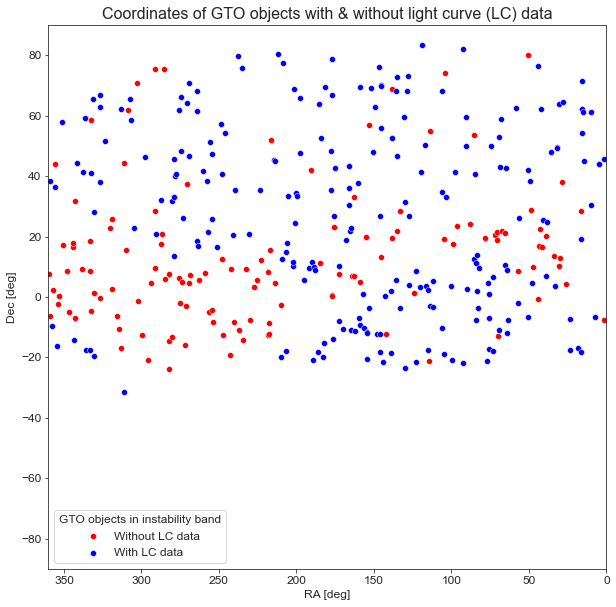

In [36]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=gto_no_lc, x='RA_J2016_deg', y='DE_J2016_deg',
                     color='red', label='Without LC data')
sns.scatterplot(data=gto[gto['has_lc'] == True], x='RA_J2016_deg', y='DE_J2016_deg',
                color='blue', label='With LC data', ax=ax)
# Set plot limits as per typical logg and Teff values in HR diagram.
x_min = 0.0
x_max = 360.0
y_min = -90.0
y_max = 90.0
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
# Set titles, sizes, etc.
ax.set_title("Coordinates of GTO objects with & without light curve (LC) data", fontsize=16)
ax.set_xlabel("RA [deg]", fontsize=12)
ax.set_ylabel("Dec [deg]", fontsize=12)
ax.tick_params(axis='both', which='major', bottom=True, left=True, labelsize=12)
ax.invert_xaxis()
plt.legend(title="GTO objects in instability band", title_fontsize='large',
           loc='best', fontsize=12)
plt.savefig(IMAGE_NO_LC_GTO_LOCATION)
plt.show();

### CARMENES and GTO objects, located in a typical HR diagram (temperature - luminosity)

In [37]:
stellar_pop.columns

Index(['star_number', 'log(t[years])', 'Metallicity[Fe/H]', 'Mass[Mo]',
       'log(L/Lo)', 'log(Teff[K])', 'InitMassSec[Mo]', 'VarStarIdx',
       'Pulsating_log(P[days])', 'u', 'g', 'r', 'i', 'z', 'u-g', 'g-r', 'r-i',
       'i-z', 'log_g', 'Teff', 'Age [Gyr]', 'Age Range [Gyr]', 'ID Age Range',
       'Metallicity Range [Fe/H]', 'ID Metallicity Range'],
      dtype='object')

In [38]:
print(carmenes.columns.to_list())

['Karmn', 'Name', 'Comp', 'GJ', 'RA_J2016_deg', 'DE_J2016_deg', 'RA_J2000', 'DE_J2000', 'l_J2016_deg', 'b_J2016_deg', 'Ref01', 'SpT', 'SpTnum', 'Ref02', 'Teff_K', 'eTeff_K', 'logg', 'elogg', '[Fe/H]', 'e[Fe/H]', 'Ref03', 'L_Lsol', 'eL_Lsol', 'Ref04', 'R_Rsol', 'eR_Rsol', 'Ref05', 'M_Msol', 'eM_Msol', 'Ref06', 'muRA_masa-1', 'emuRA_masa-1', 'muDE_masa-1', 'emuDE_masa-1', 'Ref07', 'pi_mas', 'epi_mas', 'Ref08', 'd_pc', 'ed_pc', 'Ref09', 'Vr_kms-1', 'eVr_kms-1', 'Ref10', 'ruwe', 'Ref11', 'U_kms-1', 'eU_kms-1', 'V_kms-1', 'eV_kms-1', 'W_kms-1', 'eW_kms-1', 'Ref12', 'sa_m/s/a', 'esa_m/s/a', 'Ref13', 'SKG', 'Ref14', 'SKG_lit', 'Ref14_lit', 'Pop', 'Ref15', 'vsini_flag', 'vsini_kms-1', 'evsini_kms-1', 'Ref16', 'P_d', 'eP_d', 'Ref17', 'pEWHalpha_A', 'epEWHalpha_A', 'Ref18', 'log(LHalpha/Lbol)', 'elog(LHalpha/Lbol)', 'Ref19', '1RXS', 'CRT_s-1', 'eCRT_s-1', 'HR1', 'eHR1', 'HR2', 'eHR2', 'Flux_X_E-13_ergcm-2s-1', 'eFlux_X_E-13_ergcm-2s-1', 'LX/LJ', 'eLX/LJ', 'Ref20', 'Activity', 'Ref21', 'FUV_mag',

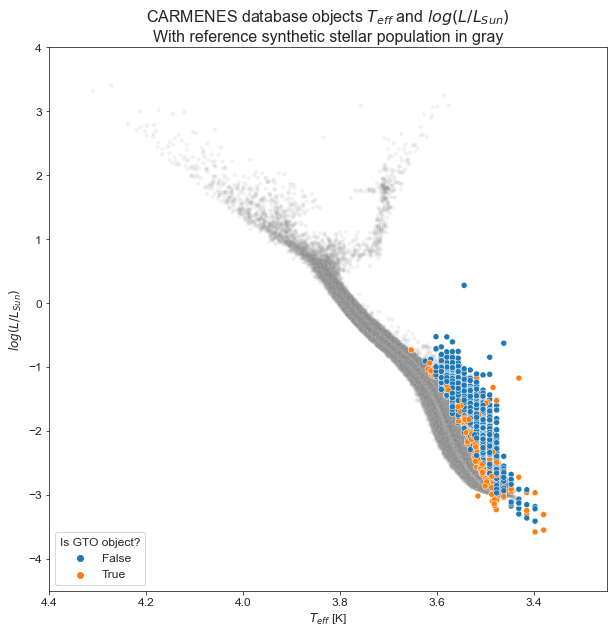

In [39]:
plt.figure(figsize=(10,10))
#ax = sns.scatterplot(data=gto, x='Teff_K', y='logg', hue='InstBand_ranged')
# Draw the synthetic population:
ax = sns.scatterplot(data=stellar_pop, x='log(Teff[K])', y='log(L/Lo)', color='gray', size=1.0, alpha=0.1,
                     legend=False)

# Set plot limits as per typical logg and Teff values in HR diagram.
x_min = 3.25
x_max = 4.40
y_min = -4.5
y_max = 4.0
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

# Add the synthetic population:
#sns.scatterplot(data=stellar_pop, x='Teff', y='log_g', color='gray', size=1.0, alpha=0.1,
#                ax=ax, legend=False)
# Add the CARMENES objetcs:
sns.scatterplot(data=carmenes, x=np.log10(carmenes['Teff_K']), y=np.log10(carmenes['L_Lsol']),
                hue='is_GTO', ax=ax, legend=True)

# Set titles, sizes etc.
ax.set_title("CARMENES database objects $T_{eff}$ and $log(L/L_{Sun})$\n"
             "With reference synthetic stellar population in gray", fontsize=16)
ax.set_xlabel("$T_{eff}$ [K]", fontsize=12)
ax.set_ylabel("$log(L/L_{Sun})$", fontsize=12)
ax.tick_params(axis='both', which='major', bottom=True, left=True, labelsize=12)
ax.invert_xaxis()
plt.legend(title="Is GTO object?", title_fontsize='large',
           loc='lower left', fontsize=12)
plt.savefig(IMAGE_HR_TEFF)
plt.show();

## Save newly modified data, GTO `NaN` rows and `NaN` count

In [40]:
gto_nan.to_csv(GTO_NAN_FILE, sep=',', decimal='.', index=True)

In [41]:
gto_nan_logg_teff.to_csv(GTO_NAN_RECORD_FILE, sep=',', decimal='.', index=False)

In [42]:
gto_no_lc.to_csv(GTO_NO_LC_FILE, sep=',', decimal='.', index=False)

In [43]:
carmenes.to_csv(OUTPUT_FILE, sep=',', decimal='.', index=False)

In [44]:
carmenes[carmenes['is_GTO'] == True].to_csv(GTO_OUTPUT_FILE, sep=',', decimal='.', index=False)

## Summary

**OBSERVATIONS AND CONCLUSIONS:**
- Instability bands:
  - From the GTO sample, we have 224 stars in the _"He3-burning"_ instability band ($\approx62\%$ of the sample).
  - If we take into account the error margins in the `logg` and `Teff_K` variables, the number increases slightly to 259 stars ($\approx71\%$ of the sample))
  - The percentages in the _"He3-burning"_ instability bands for the sample of non-GTO stars are $\approx41\%$ (nominal) and $\approx49\%$ (ranged).
  - Hence, **a greater fraction of GTO stars are prone to belong to the _He3-burning_ instability band**.
  - No star in the total _CARMENES_ sample is located in the _"D-burning"_ stability band.
  - Notice that some stars in the database have no `Teff_K` or `logg` values, so their belonging to instability bands is unknown:
    - 4 GTO stars have no `logg` value. All GTO stars have `Teff_K`value.
    - 555 non-GTO stars have no `Teff_K`value; 556 non-GTO stars have no `logg` value.
- **133 GTO objects ($\approx37\%$) do not have TESS light curve information**, and not all of them are located in a specific region of the sky:
  - 87 of them are in the He-3 burning instability band.